In [1]:
# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

#### 1. Reading the Excel Sheet

##### Analyzing orders sheet

In [3]:
orders = pd.read_excel("Retail_dataset.xlsx", sheet_name="orders")
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name="order_items")
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name="customers")
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name="payments")
products = pd.read_excel("Retail_dataset.xlsx", sheet_name="products")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [4]:
 #!pip install openpyxl

In [5]:
orders.shape

(99441, 7)

In [6]:
# Are "order_id" unique?

orders.order_id.duplicated().sum()

0

In [7]:
# Are "customer_id" unique? Ofcourse not

orders.customer_id.duplicated().sum()

3345

In [8]:
orders.customer_id.value_counts().sort_values(ascending=False).head(25)

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
63cfc61cee11cbe306bff5857d00bfe4     6
f0e310a6839dce9de1638e0fe5ab282a     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
dc813062e0fc23409cd255f7f53c7074     6
de34b16117594161a6a89c50b289d35a     6
5e8f38a9a1c023f3db718edcf926a2db     5
4e65032f1f574189fb793bac5a867bbc     5
394ac4de8f3acb14253c177f0e15bc58     5
b4e4f24de1e8725b74e4a1f4975116ed     5
fe81bb32c243a86b2f86fbf053fe6140     5
74cb1ad7e6d5674325c1f99b5ea30d82     5
35ecdf6858edc6427223b64804cf028e     5
56c8638e7c058b98aae6d74d2dd6ea23     5
ec7f1811826ab04a27a92197bc40c888     4
c8460e4251689ba205045f3ea17884a1     4
c37cc6c1a59d81460a3059744f7ada1c     4
acea6bd29b8c1e3c6a8b266a8fb4475e     4
9cc5a07f169a1606fd347a56683e6ea6     4
d3359a56d96666ac0c21bb01e7a61c95     4
Name: customer_id, dtype:

In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [10]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [11]:
#checking for the percentage data frequency
orders.order_status.value_counts(normalize=True)*100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

In [12]:
# check for null values
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
# Since we are only interested in orders "delivered". Let's trim the data to accomodate only 'delivered' orders

In [14]:
orders = orders[orders.order_status == "delivered"]
orders.shape

(96478, 7)

In [15]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [16]:
# Are there any missing values?

orders.isna().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
order_purchase_timestamp          0
order_status                      0
customer_id                       0
order_id                          0
dtype: int64

#### Now we will fill the NaN values with calculated difference using other fields

In [17]:
# we have taken median of differences between order_approved_at and order_purchased and then filled the nan values with sum of order_purchased and diff
diff = (orders['order_approved_at'] - orders['order_purchase_timestamp']).median()
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'] + diff,inplace=True)
# we have taken median of differences between order_delivered_carrier_date and order_approved_at and then filled the nan values with sum of order_approved_at and diff
diff = (orders['order_delivered_timestamp'] - orders['order_approved_at']).median()
orders['order_delivered_timestamp'].fillna(orders['order_approved_at'] + diff,inplace=True)

In [20]:
# Are there any missing values left?

orders.isna().sum().sort_values(ascending=False)

delivery_time_duration           0
delayed                          0
order_estimated_delivery_date    0
order_delivered_timestamp        0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_id                      0
order_id                         0
dtype: int64

In [21]:
# check for duplicated values
orders.duplicated().sum()

0

#### Now moving onto order_items sheet.

In [22]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [23]:
order_items.shape

(112650, 6)

In [24]:
order_items.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

#### Reading 'customers' sheet.

In [25]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [26]:
customers.shape

(99441, 4)

In [27]:
customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [28]:
customers.customer_id.duplicated().sum()

3345

In [29]:
customers[customers.customer_id.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [30]:
customers[customers.customer_id.duplicated()].shape

(3345, 4)

In [31]:
customers.shape

(99441, 4)

In [32]:
99441 - 3345

96096

In [33]:
customers.drop_duplicates(subset="customer_id", keep="first")


,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [34]:
customers.drop_duplicates(subset="customer_id", keep="first").shape

(96096, 4)

In [35]:
customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)


In [36]:
customers.shape

(96096, 4)

In [37]:
customers.customer_id.duplicated().sum()

0

##### Reading 'payments' sheet.

In [38]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [39]:
payments.shape

(103886, 5)

In [40]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

##### Reading 'products' sheet.

In [41]:
products.shape

(32951, 6)

In [42]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [43]:
products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_width_cm           2
product_height_cm          2
product_length_cm          2
product_weight_g           2
product_id                 0
dtype: int64

In [44]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [45]:
products.product_category_name.value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
fashion_childrens_clothes                1
home_comfort_2                           1
diapers_and_hygiene                      1
security_and_services                    1
furniture_mattress_and_upholstery        1
Name: product_category_name, Length: 70, dtype: int64

In [46]:
products.product_category_name.value_counts(normalize=True)*100

toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
fashion_childrens_clothes             0.003051
home_comfort_2                        0.003051
diapers_and_hygiene                   0.003051
security_and_services                 0.003051
furniture_mattress_and_upholstery     0.003051
Name: product_category_name, Length: 70, dtype: float64

In [47]:
products.product_category_name.mode()[0]

'toys'

In [48]:
# Filling the missing number of product categories with 'Toys' as it is the most occuring product category.

In [49]:
products.product_category_name.fillna(products.product_category_name.mode()[0], inplace=True)

In [50]:
products.isna().sum().sort_values(ascending=False)

product_width_cm         2
product_height_cm        2
product_length_cm        2
product_weight_g         2
product_category_name    0
product_id               0
dtype: int64

In [51]:
products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [52]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [53]:
num_cols = products.describe().columns.to_list()
num_cols

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

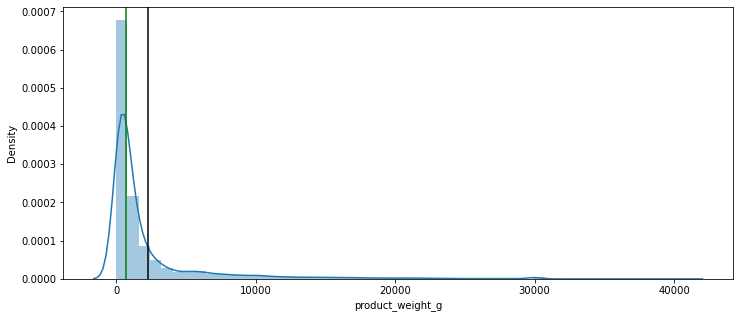

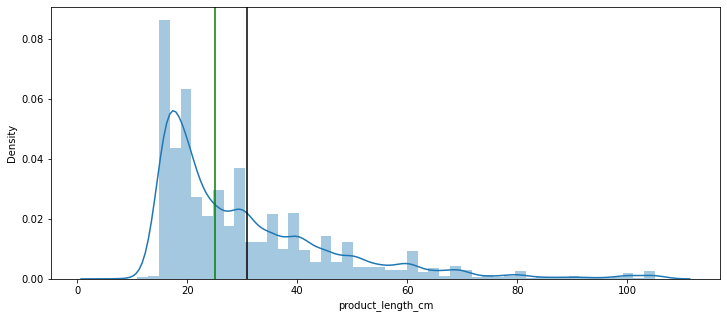

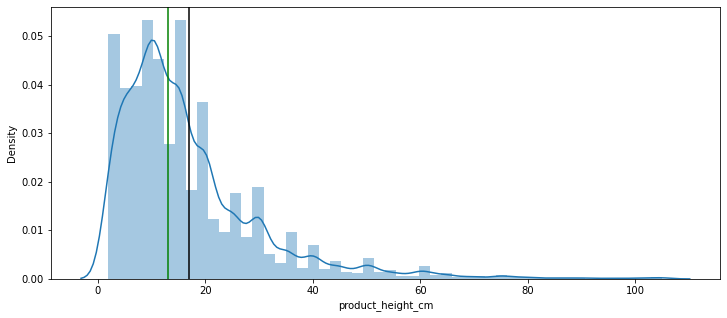

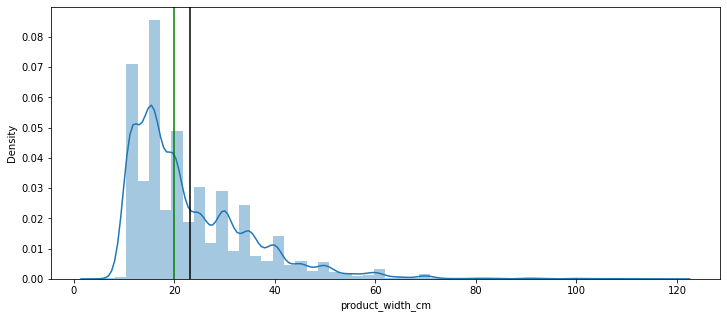

In [54]:
for i in num_cols:
    plt.figure(figsize=(12,5))
    sns.distplot(products[i])
    plt.axvline(products[i].mean(), color="black")
    plt.axvline(products[i].median(), color="green")
    plt.show()
    print("="*90)

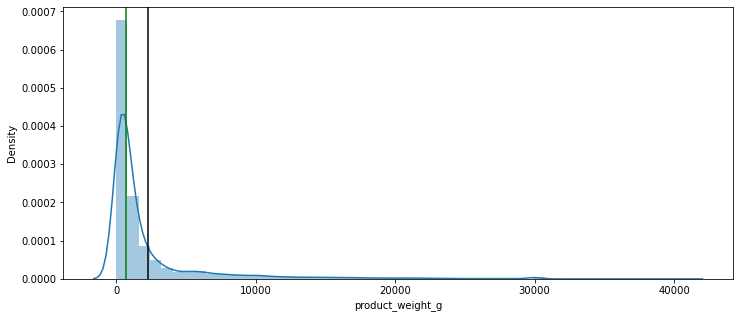

In [55]:
plt.figure(figsize=(12,5))
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="black")
plt.axvline(products.product_weight_g.median(), color="green")
plt.show()

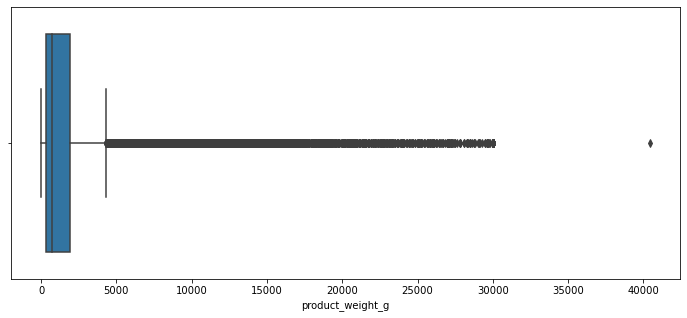

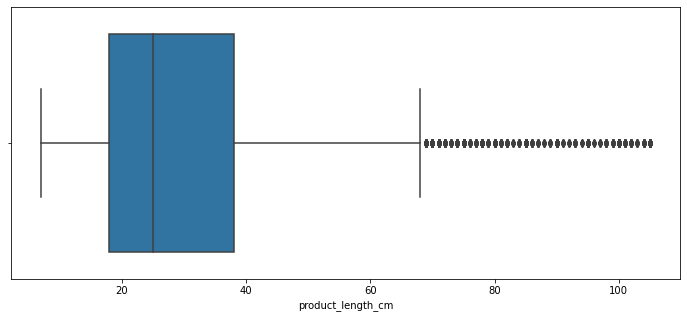

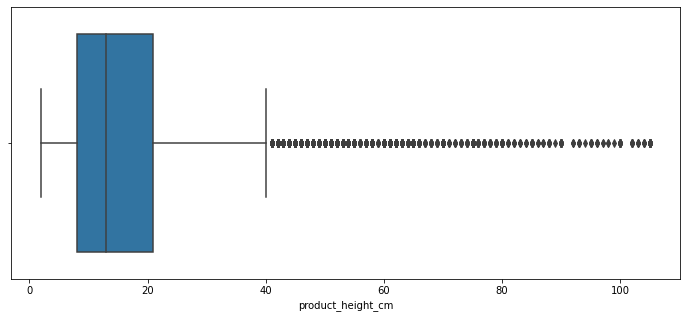

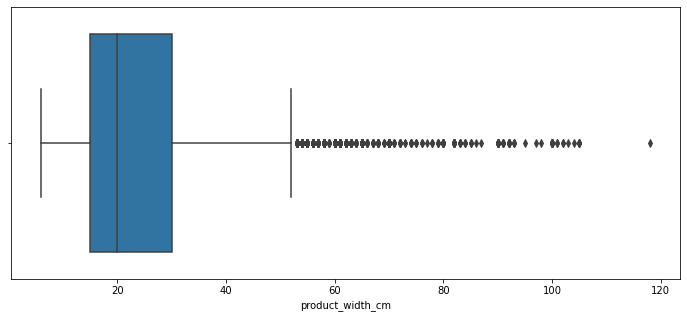

In [56]:
for i in num_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(products[i])
    plt.show()
    print("="*90)

In [57]:
for i in num_cols:
    products[i].fillna(products[i].median(), inplace=True)

In [58]:
products.isna().sum().sort_values(ascending=False)

product_width_cm         0
product_height_cm        0
product_length_cm        0
product_weight_g         0
product_category_name    0
product_id               0
dtype: int64

In [59]:
writer = pd.ExcelWriter('New_Retail_dataset.xlsx', engine='xlsxwriter')

In [60]:
# Write each dataframe to a different worksheet.
orders.to_excel(writer, sheet_name='orders')
order_items.to_excel(writer, sheet_name='order_items')
customers.to_excel(writer, sheet_name='customers')
products.to_excel(writer, sheet_name='products')
payments.to_excel(writer, sheet_name='payments')


In [61]:
# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Merging DataFrames

In [62]:
ord_prod =pd.merge(order_items, products, on="product_id", how="inner")
ord_prod.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0


In [63]:
cust_ord =pd.merge(orders, customers, on="customer_id", how="inner")
cust_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delayed,delivery_time_duration,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,0,1 days 07:53:42,3149,sao paulo,SP
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08,47813,barreiras,BA
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,0,9 days 09:27:40,75265,vianopolis,GO
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,0,13 days 05:00:36,59296,sao goncalo do amarante,RN


In [64]:
ord_pay = pd.merge(cust_ord, payments, on="order_id", how="inner")
ord_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delayed,delivery_time_duration,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,2,voucher,1,18.59
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,0,1 days 07:53:42,3149,sao paulo,SP,1,credit_card,1,44.11
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08,47813,barreiras,BA,1,wallet,1,141.46


In [65]:
ord_final = pd.merge(ord_pay, ord_prod, on="order_id", how="inner")
ord_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delayed,delivery_time_duration,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,0,1 days 07:53:42,3149,...,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,baby,350.0,19.0,14.0,12.0
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08,47813,...,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,toys,400.0,19.0,13.0,19.0


In [66]:
ord_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115035 entries, 0 to 115034
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       115035 non-null  object         
 1   customer_id                    115035 non-null  object         
 2   order_status                   115035 non-null  object         
 3   order_purchase_timestamp       115035 non-null  datetime64[ns] 
 4   order_approved_at              115035 non-null  datetime64[ns] 
 5   order_delivered_timestamp      115035 non-null  datetime64[ns] 
 6   order_estimated_delivery_date  115035 non-null  datetime64[ns] 
 7   delayed                        115035 non-null  int32          
 8   delivery_time_duration         115035 non-null  timedelta64[ns]
 9   customer_zip_code_prefix       115035 non-null  int64          
 10  customer_city                  115035 non-null  object  

In [67]:
ord_final.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
delayed                          0
delivery_time_duration           0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [68]:
# Most number of product delivered
ord_final.product_category_name.value_counts().nlargest(10)

toys                     86777
health_beauty             3047
bed_bath_table            2690
sports_leisure            2332
computers_accessories     2209
furniture_decor           2193
housewares                1718
watches_gifts             1555
telephony                 1229
auto                      1076
Name: product_category_name, dtype: int64

toys                               86777
health_beauty                       3047
bed_bath_table                      2690
sports_leisure                      2332
computers_accessories               2209
furniture_decor                     2193
housewares                          1718
watches_gifts                       1555
telephony                           1229
auto                                1076
garden_tools                        1070
cool_stuff                          1020
perfumery                            856
baby                                 788
electronics                          722
office_furniture                     702
stationery                           638
pet_shop                             513
fashion_bags_accessories             445
construction_tools_construction      254
Name: product_category_name, dtype: int64

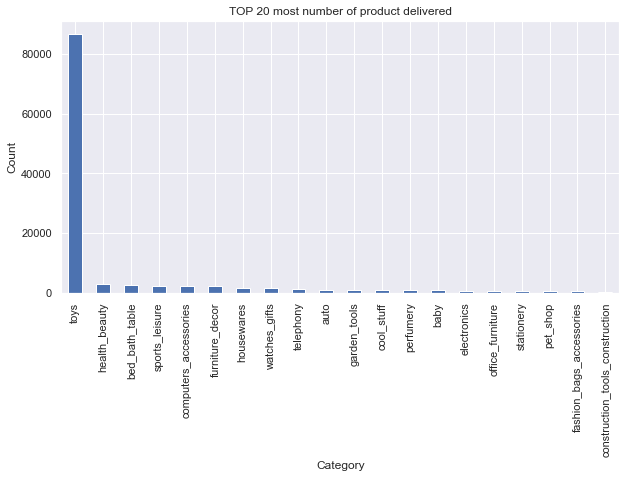

In [69]:
%matplotlib inline 
sns.set(color_codes=True)
b=ord_final.product_category_name.value_counts().nlargest(20)
# Checking most ordered product
ord_final.product_category_name.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("TOP 20 most number of product delivered")
plt.ylabel('Count')
plt.xlabel('Category');
b


We can see that the most frequent purchases from a product category are in the following order:
1. Toys
2. Health and Beauty
3. Bed Bath Table
4. Sports and Leisure
5. Computer Accessories


In [70]:
#most number of product ordered vs revenue
prod_rev=ord_final.groupby(by=["product_category_name"])["price"].sum()

0                      toys
1             health_beauty
2             watches_gifts
3            sports_leisure
4     computers_accessories
5            bed_bath_table
6                cool_stuff
7           furniture_decor
8                housewares
9                      auto
10         office_furniture
11             garden_tools
12                     baby
13                perfumery
14                telephony
15                 pet_shop
16               stationery
17                computers
18         small_appliances
19        home_appliances_2
Name: product_category_name, dtype: object

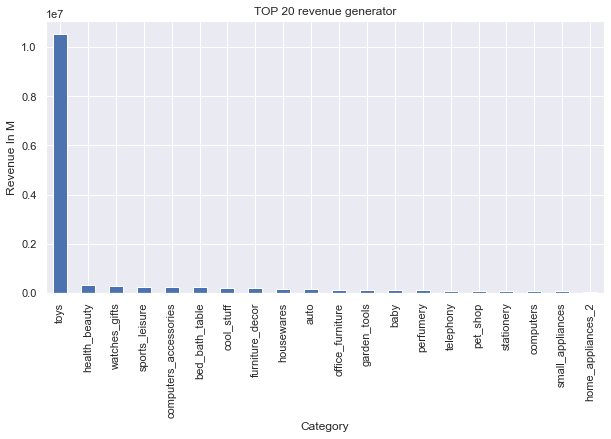

In [71]:
# Top 20 revenue genrating products
a=pd.DataFrame(prod_rev.nlargest(20)).reset_index()
prod_rev.nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("TOP 20 revenue generator")
plt.ylabel('Revenue In M')
plt.xlabel('Category');

a.product_category_name

Toys health and beauty and watches and gift make up more than 80% of all revenue

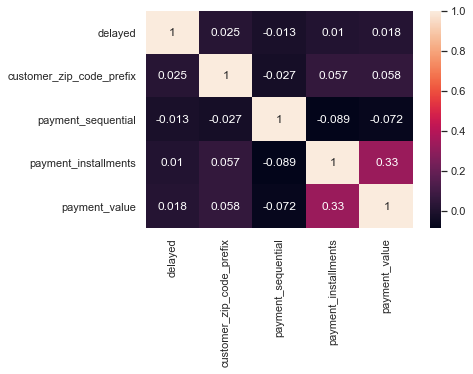

In [72]:
sns.heatmap(ord_pay.corr(),annot=True)
plt.show()

### RFM Modelling:

We need to create 3 freatures from the data:

1. Recency: Latest date- last purchase date
2. Frequency: Total no. of transactions made by a single customer (count of order id)
3. Monetary: Total value of transacted sales by each customer.

##### Calculating  Recency


In [73]:
#finding the last date on which a customer made purchase
recency=pd.DataFrame(ord_final.groupby('product_id')['order_purchase_timestamp'].max().reset_index())

In [74]:
recency['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [75]:
# Calculating recency using maximum date of purchase made by a customer as the date to calculate the recency of purchases
recency['recent_days']=(recency['order_purchase_timestamp'].max()-recency['order_purchase_timestamp']).dt.days
recency

,product_id,order_purchase_timestamp,recent_days
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20 18:45:21,100
1,00088930e925c41fd95ebfe695fd2655,2017-12-12 19:20:28,259
2,0009406fd7479715e4bef61dd91f2462,2017-12-21 16:21:47,250
3,000b8f95fcb9e0096488278317764d19,2018-08-10 13:24:35,19
4,000d9be29b5207b54e86aa1b1ac54872,2018-04-03 09:24:12,148
...,...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,2017-09-03 11:38:54,360
32212,fff81cc3158d2725c0655ab9ba0f712c,2018-07-30 09:18:59,30
32213,fff9553ac224cec9d15d49f5a263411f,2017-10-06 16:44:05,326
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-10 17:15:07,18


##### Calculating Frequency


We will count the number of unique orders made by each customer to obtain their purchase frequencies.

In [76]:
frequency=pd.DataFrame(ord_final.groupby('product_id')['customer_id'].count().reset_index())
frequency

,product_id,customer_id
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,2
32212,fff81cc3158d2725c0655ab9ba0f712c,1
32213,fff9553ac224cec9d15d49f5a263411f,1
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,5


##### Calculating Monetary

In [77]:
monetary=pd.DataFrame(ord_final[['product_id','payment_value']].groupby('product_id')['payment_value'].sum().reset_index())
monetary

,product_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,120.24
1,00088930e925c41fd95ebfe695fd2655,143.83
2,0009406fd7479715e4bef61dd91f2462,242.10
3,000b8f95fcb9e0096488278317764d19,157.00
4,000d9be29b5207b54e86aa1b1ac54872,218.27
...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,285.39
32212,fff81cc3158d2725c0655ab9ba0f712c,97.89
32213,fff9553ac224cec9d15d49f5a263411f,43.85
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,228.82


In [78]:
#now I will merge recency,frequency and monetary dataframe
df_rfm=pd.merge(recency,frequency,on='product_id')
df_rfm=pd.merge(df_rfm,monetary,on='product_id')
df_rfm

,product_id,order_purchase_timestamp,recent_days,customer_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20 18:45:21,100,1,120.24
1,00088930e925c41fd95ebfe695fd2655,2017-12-12 19:20:28,259,1,143.83
2,0009406fd7479715e4bef61dd91f2462,2017-12-21 16:21:47,250,1,242.10
3,000b8f95fcb9e0096488278317764d19,2018-08-10 13:24:35,19,2,157.00
4,000d9be29b5207b54e86aa1b1ac54872,2018-04-03 09:24:12,148,1,218.27
...,...,...,...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,2017-09-03 11:38:54,360,2,285.39
32212,fff81cc3158d2725c0655ab9ba0f712c,2018-07-30 09:18:59,30,1,97.89
32213,fff9553ac224cec9d15d49f5a263411f,2017-10-06 16:44:05,326,1,43.85
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-10 17:15:07,18,5,228.82


In [79]:
#dropping unneccesary column
df_rfm.drop(['order_purchase_timestamp'],axis=1,inplace=True)
df_rfm

,product_id,recent_days,customer_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24
1,00088930e925c41fd95ebfe695fd2655,259,1,143.83
2,0009406fd7479715e4bef61dd91f2462,250,1,242.10
3,000b8f95fcb9e0096488278317764d19,19,2,157.00
4,000d9be29b5207b54e86aa1b1ac54872,148,1,218.27
...,...,...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,360,2,285.39
32212,fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89
32213,fff9553ac224cec9d15d49f5a263411f,326,1,43.85
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,18,5,228.82


In [80]:
# Recency= Days from last purchase
#Frequency= Number of purchase made
#Monetary= total amount purchased by a customer
df_rfm.columns=['product_id','Recency','Frequency','Monetary']
df_rfm.reset_index()
df_rfm.set_index("product_id",inplace=True)

In [81]:
df_rfm

,Recency,Frequency,Monetary
product_id,,,
00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24
00088930e925c41fd95ebfe695fd2655,259,1,143.83
0009406fd7479715e4bef61dd91f2462,250,1,242.10
000b8f95fcb9e0096488278317764d19,19,2,157.00
000d9be29b5207b54e86aa1b1ac54872,148,1,218.27
...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,360,2,285.39
fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89
fff9553ac224cec9d15d49f5a263411f,326,1,43.85


In [82]:
#descriptive stats for the RFM analysis
df_rfm.describe()

,Recency,Frequency,Monetary
count,32216.000000,32216.000000,32216.000000
mean,205.558884,3.570741,613.861449
std,159.211091,10.971294,2163.471674
min,0.000000,1.000000,9.590000
25%,67.000000,1.000000,91.787500
50%,174.000000,1.000000,198.260000
75%,312.000000,3.000000,477.425000
max,695.000000,529.000000,109312.640000


In [83]:
df_rfm_log = df_rfm.copy()
print(df_rfm_log.describe())

            Recency     Frequency       Monetary
count  32216.000000  32216.000000   32216.000000
mean     205.558884      3.570741     613.861449
std      159.211091     10.971294    2163.471674
min        0.000000      1.000000       9.590000
25%       67.000000      1.000000      91.787500
50%      174.000000      1.000000     198.260000
75%      312.000000      3.000000     477.425000
max      695.000000    529.000000  109312.640000


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

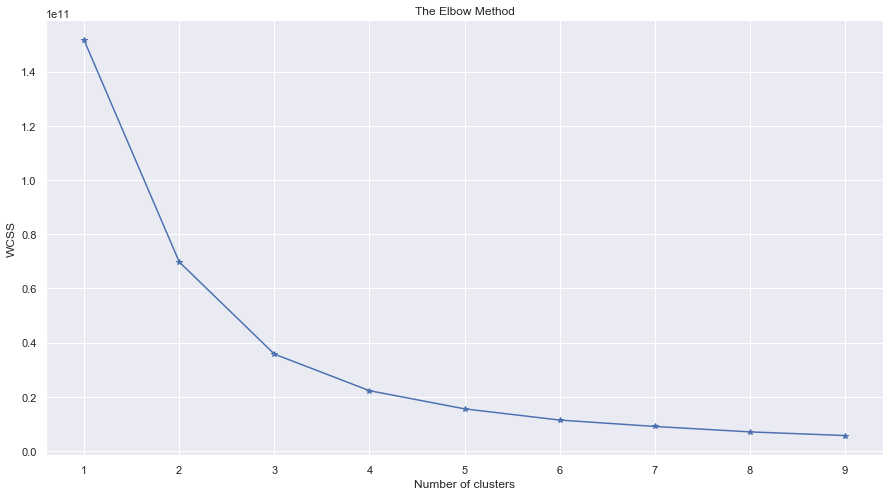

In [85]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_rfm_log)
    wcss.append(kmeans.inertia_)

f, ax = plt.subplots(figsize=(15, 8))  
plt.style.use('_classic_test_patch')  
plt.plot(range(1, 10), wcss, '-*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

#### Observation:

We can see there is a sharp turn from the 4 point. We can select values between 4 to 6 for our clusters.

Lets plot all the clusters 4, 5 & 6 to see which is defined better.


In [86]:
(df_rfm[df_rfm["Frequency"]>1].shape[0]/32216)*100

47.04805065805811

#### From this above calculation we can say that around 47% customers are one time customers and only 53% are recurring customers.

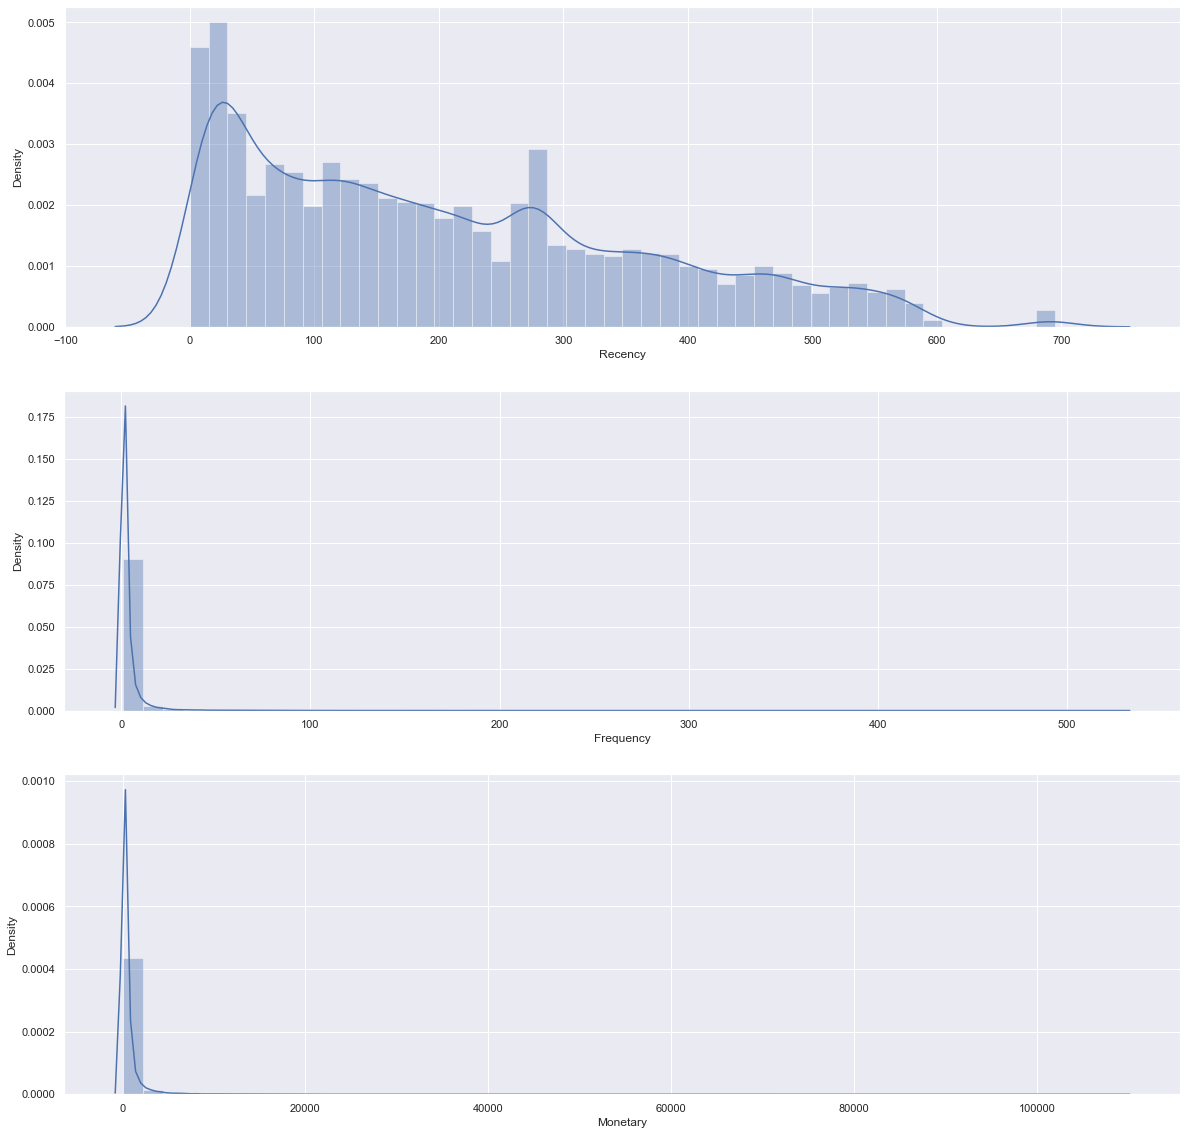

In [87]:
#plot RFM distribution
plt.figure(figsize=(20,20))
#plot distribution of Recency
plt.subplot(3,1,1);
sns.distplot(df_rfm["Recency"])

#plot distribution of Frequency
plt.subplot(3,1,2);
sns.distplot(df_rfm["Frequency"])

#plot distribution of Monetary
plt.subplot(3,1,3);
sns.distplot(df_rfm["Monetary"])
plt.show()

In [88]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(df_rfm_log)
cluster_labels = kmeans.labels_
data_rfm_k4 = df_rfm_log.assign(Cluster=cluster_labels)
grouped = data_rfm_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         209.1       2.5    342.9  30776
1          96.4      68.1  17297.7    144
2          82.8     226.3  58130.6     21
3         134.1      18.2   4322.3   1275

In [89]:
data_melt = pd.melt(
                    data_rfm_k4.reset_index(),               
                    id_vars=['product_id', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                    var_name='Metric', value_name='Value'
                    )
data_melt.head(10)

,product_id,Cluster,Metric,Value
0,00066f42aeeb9f3007548bb9d3f33c38,0,Recency,100.0
1,00088930e925c41fd95ebfe695fd2655,0,Recency,259.0
2,0009406fd7479715e4bef61dd91f2462,0,Recency,250.0
3,000b8f95fcb9e0096488278317764d19,0,Recency,19.0
4,000d9be29b5207b54e86aa1b1ac54872,0,Recency,148.0
5,0011c512eb256aa0dbbb544d8dffcf6e,0,Recency,257.0
6,00126f27c813603687e6ce486d909d01,0,Recency,345.0
7,001795ec6f1b187d37335e1c4704762e,0,Recency,245.0
8,001b237c0e9bb435f2e54071129237e9,0,Recency,20.0
9,001b72dfd63e9833e8c02742adf472e3,0,Recency,259.0


#### RFM Quartiles

The simples way to create product segments from RFM model is to use quartiles.We assign score from 1 to 4 to Recency,Frequency and Monetary.4 is the best/heighest value, and 1 is the lowest/worst value. A RFM score is calculated simply by combining individual RFM score numbers.

In [90]:
quantiles=df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'Recency': {0.25: 67.0, 0.5: 174.0, 0.75: 312.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 3.0},
 'Monetary': {0.25: 91.7875, 0.5: 198.26, 0.75: 477.42500000000007}}

In [91]:
#x=value, p=recency,frequency, monetary_value,  d=quartiles dict
def RScore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

# x=value, p=recency,frequency, monetary_value,  k=quartiles dict
def FMScore(x,p,k):
    if x<=k[p][0.25]:
        return 1
    elif x<=k[p][0.50]:
        return 2
    elif x<=k[p][0.75]:
        return 3
    else:
        return 4

In [92]:
#create RFM segmentation table
rfm_segmentation=df_rfm
rfm_segmentation['R_Quartile']=rfm_segmentation["Recency"].apply(RScore,args=('Recency',quantiles))
rfm_segmentation['F_Quartile']=rfm_segmentation["Frequency"].apply(FMScore,args=('Frequency',quantiles))
rfm_segmentation['M_Quartile']=rfm_segmentation["Monetary"].apply(FMScore,args=('Monetary',quantiles))

In [93]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
product_id,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24,3,1,2
00088930e925c41fd95ebfe695fd2655,259,1,143.83,2,1,2
0009406fd7479715e4bef61dd91f2462,250,1,242.10,2,1,3
000b8f95fcb9e0096488278317764d19,19,2,157.00,4,3,2
000d9be29b5207b54e86aa1b1ac54872,148,1,218.27,3,1,3
...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,360,2,285.39,1,3,3
fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89,4,1,2
fff9553ac224cec9d15d49f5a263411f,326,1,43.85,1,1,1


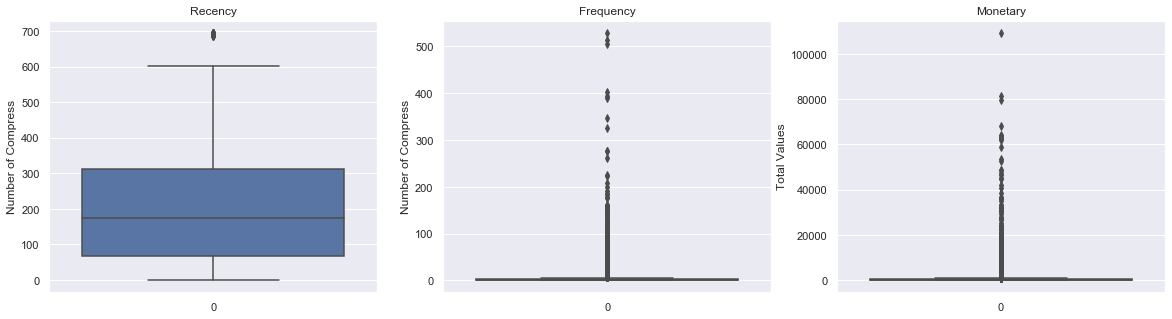

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=df_rfm['Recency'])
plt.title('Recency')
plt.ylabel('Number of Compress')
plt.subplot(1,3,2)
sns.boxplot(data=df_rfm['Frequency'])
plt.title('Frequency')
plt.ylabel('Number of Compress')
plt.subplot(1,3,3)
sns.boxplot(data=df_rfm['Monetary'])
plt.title('Monetary')
plt.ylabel('Total Values')
plt.show()

In [95]:
rfm_segmentation['RFMScore']=rfm_segmentation.R_Quartile.map(str)+rfm_segmentation.F_Quartile.map(str)+rfm_segmentation.M_Quartile.map(str)
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24,3,1,2,312
00088930e925c41fd95ebfe695fd2655,259,1,143.83,2,1,2,212
0009406fd7479715e4bef61dd91f2462,250,1,242.10,2,1,3,213
000b8f95fcb9e0096488278317764d19,19,2,157.00,4,3,2,432
000d9be29b5207b54e86aa1b1ac54872,148,1,218.27,3,1,3,313
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,360,2,285.39,1,3,3,133
fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89,4,1,2,412
fff9553ac224cec9d15d49f5a263411f,326,1,43.85,1,1,1,111


In [219]:
def segment(x):
    if x in ['444','443','433','442','434']:
        return 'Superhit Products'
    elif x in [ '432','341','342','332','333','344','343','441']:
        return 'Fast Moving Average Price Products '
    elif x in ['334', '234','214','224','413','314','244','243']:
        return 'Costly Products'
    elif x in ['212', '213', '222','211','114','311','312','214','143','142','141','241']:
        return 'Infrequent Products'
    elif x in ['111', '121','112','113','144']:
        return 'Hardly Any Sale Products'
    else:
        return 'Average Sale Products'

In [220]:
rfm_segmentation['segments'] = rfm_segmentation['RFMScore'].apply(segment)
rfm_segmentation['segments'].value_counts()

Average Sale Products                  7850
Infrequent Products                    7602
Hardly Any Sale                        5398
Fast Moving Average Price Products     3880
Superhit Products                      3804
Costly Products                        3682
Name: segments, dtype: int64

In [221]:
segmentwise = rfm_segmentation.groupby('segments').agg(RecencyMean = ('Recency', 'mean'),
                                          FrequencyMean = ('Frequency', 'mean'),
                                          MonetaryMean = ('Monetary', 'mean'),
                                          GroupSize = ('Recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Average Sale Products,189.908535,1.694013,245.769522,7850
Costly Products,170.920424,4.002173,1089.040334,3682
Fast Moving Average Price Products,105.236082,6.373969,980.425448,3880
Hardly Any Sale,436.716191,1.874954,359.283874,5398
Infrequent Products,214.496974,1.190345,167.866961,7602
Superhit Products,27.828076,11.330179,1792.174934,3804


In [222]:
#!pip install squarify

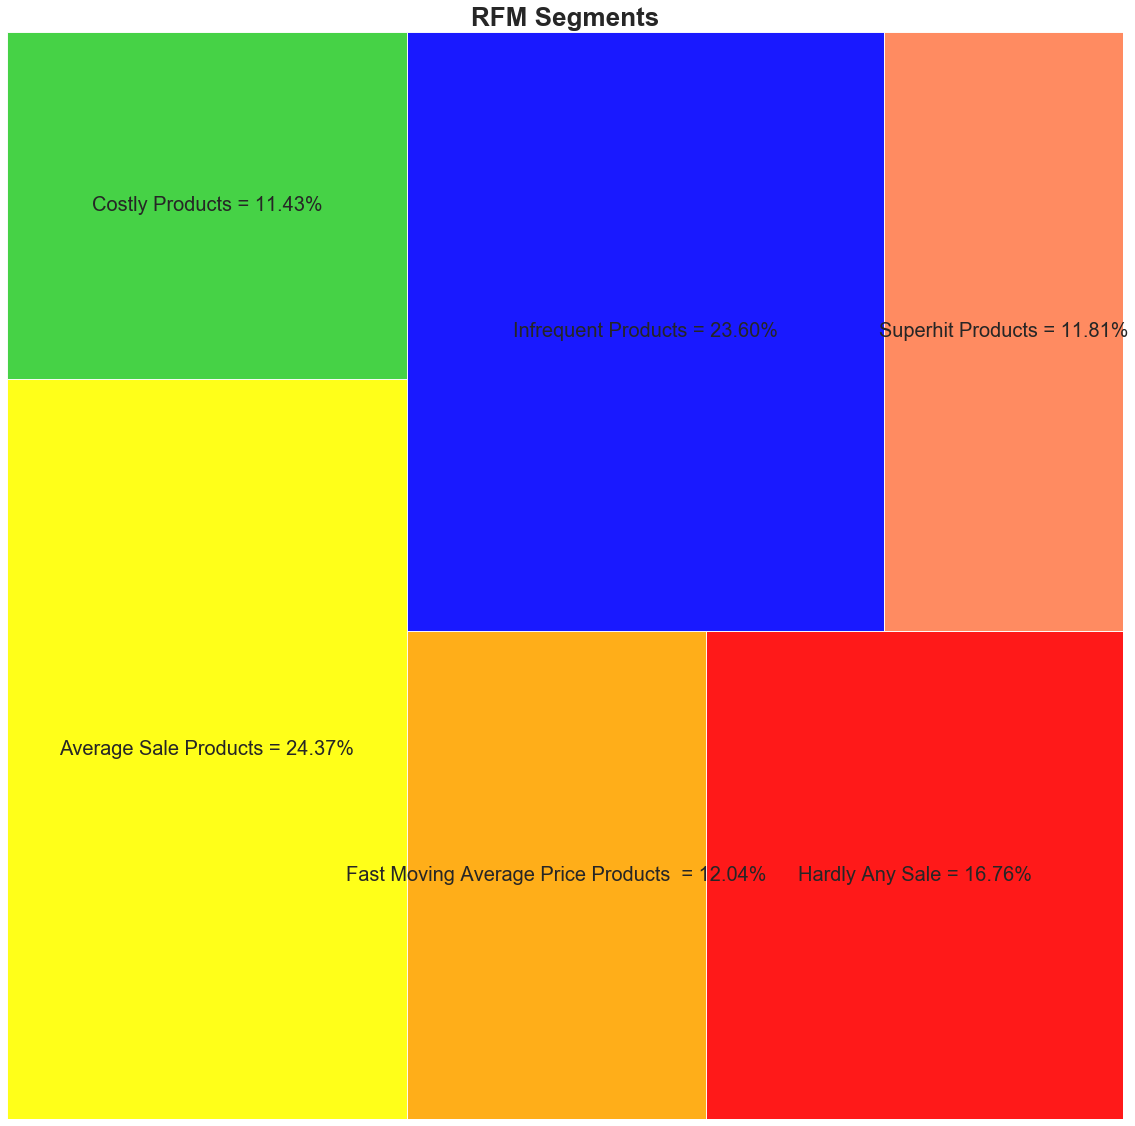

In [223]:
import squarify
perc = [str('{:.2f}'.format(i/segmentwise['GroupSize'].sum()*100)) + "%" for i in segmentwise['GroupSize']]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 20)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = [f'{el[0]} = {el[1]}' for el in zip(segmentwise.index, perc)],
              color = ['yellow', 'limegreen', 'orange', 'red', 'blue', 'coral'],
              alpha = 0.9,text_kwargs={'fontsize':20})
plt.title("RFM Segments",fontsize=26,fontweight="bold")
plt.axis('off')
plt.show()

#### Observation

- There is almost equal proportions of average sale and infrequent cheap products. They make approx 50% of inventory
- Superhit Products and Fast moving average price product account for 25% of inventory
- Hardly any Sale products account for 1 out of every 6 products in the  inventory

In [224]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segments
product_id,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24,3,1,2,312,Infrequent Products
00088930e925c41fd95ebfe695fd2655,259,1,143.83,2,1,2,212,Infrequent Products
0009406fd7479715e4bef61dd91f2462,250,1,242.10,2,1,3,213,Infrequent Products
000b8f95fcb9e0096488278317764d19,19,2,157.00,4,3,2,432,Fast Moving Average Price Products
000d9be29b5207b54e86aa1b1ac54872,148,1,218.27,3,1,3,313,Average Sale Products
...,...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,360,2,285.39,1,3,3,133,Average Sale Products
fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89,4,1,2,412,Average Sale Products
fff9553ac224cec9d15d49f5a263411f,326,1,43.85,1,1,1,111,Hardly Any Sale


In [225]:
y= rfm_segmentation.merge(products[['product_id','product_category_name']],on='product_id',how='left')

In [226]:
y = y.loc[:, ['product_category_name','segments']]

In [227]:
y

,product_category_name,segments
0,toys,Infrequent Products
1,auto,Infrequent Products
2,toys,Infrequent Products
3,housewares,Fast Moving Average Price Products
4,toys,Average Sale Products
...,...,...
32211,toys,Average Sale Products
32212,health_beauty,Average Sale Products
32213,toys,Hardly Any Sale
32214,toys,Superhit Products


In [228]:
pivot = pd.pivot_table(data=y, index=['product_category_name'], columns=['segments'], aggfunc=len,  fill_value=0)

In [229]:
pivot_sort=pivot.sort_values('Costly Products', ascending=False)

In [230]:
pivot_sort

segments,Average Sale Products,Costly Products,Fast Moving Average Price Products,Hardly Any Sale,Infrequent Products,Superhit Products
product_category_name,,,,,,
toys,5875,2779,2970,4128,5806,2793
furniture_decor,154,80,64,161,139,70
bed_bath_table,186,76,117,135,163,104
computers_accessories,94,74,49,52,89,53
sports_leisure,159,71,85,126,189,80
...,...,...,...,...,...,...
fashion_childrens_clothes,0,0,1,0,0,0
home_comfort_2,0,0,0,1,0,0
fashion_sport,1,0,0,2,0,0


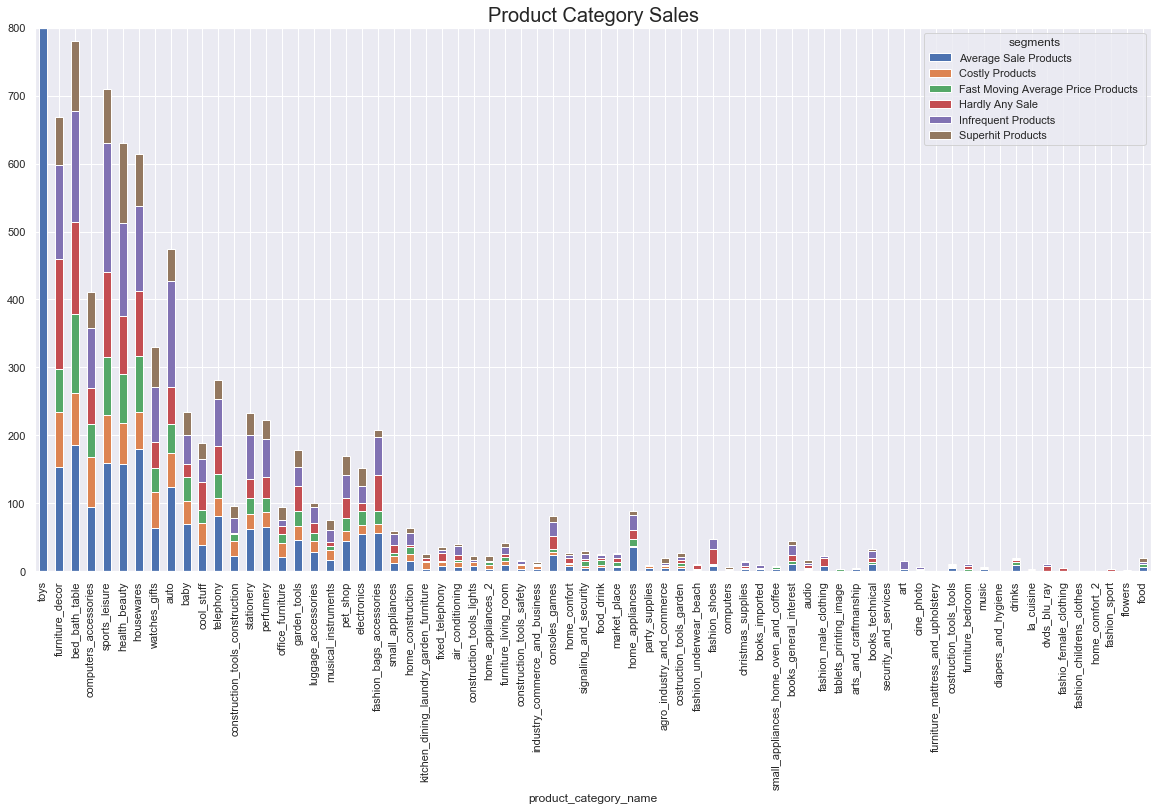

In [231]:
ax = pivot_sort.plot.bar(stacked=True, figsize=(20,10))
ax.set_title('Product Category Sales', fontsize=20)
ax.set_ylim(0,800)
plt.show()


##### Observation

- It is observed that around 20 product categories account for 80% of Overall Sale
- Close to 40-50 % of furniture decor , bed bath table, sports_leisure, fashion bags and accessories and auto have low frequency or hardly any sale products
- Flowers, home comfort, fashion childrends clothing , furniture mattress and upholstry , security and services and many more  have hardly any sale

# Market Basket Analysis

In [232]:
len(order_items['order_id'].unique())

98666

In [233]:
order_items.shape

(112650, 6)

In [234]:
data = order_items.merge(products[['product_id','product_category_name']], on='product_id', how='inner')

In [235]:
data.shape

(112650, 7)

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               112650 non-null  object 
 1   order_item_id          112650 non-null  int64  
 2   product_id             112650 non-null  object 
 3   seller_id              112650 non-null  object 
 4   price                  112650 non-null  float64
 5   shipping_charges       112650 non-null  float64
 6   product_category_name  112650 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ MB


In [237]:
# Creating a basket for the analysis 
Basket = (data.groupby(['order_id', 'product_category_name'])
          ['order_item_id'].sum().unstack().reset_index().fillna(0).set_index('order_id'))

In [238]:
Basket

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffcd46ef2263f404302a634eb57f7eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fffce4705a9662cd70adb13d4a31832d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [239]:
# Converting the values to 0 or 1

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

Basket_encode = Basket.applymap(encode_units)
Basket_encode

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [240]:
# Filter the Basket with the sum of values having >=2

Basket_encode_filter = Basket_encode[(Basket_encode > 0).sum(axis=1) >=2]
Basket_encode_filter

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff632bc583a94f23c59db4cbaa0ba2ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ffa466d3e55f98477b7e0da764df3c6c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ffb9a9cd00c74c11c24aa30b3d78e03b,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [241]:
 #!pip install mlxtend

In [242]:
# Importing libraries for performing Market Basket Analysis.

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [243]:
frequent_itemsets = apriori(Basket_encode_filter, min_support=0.03, 
                            use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemsets["Length"] = frequent_itemsets['itemsets'].apply(lambda x:len(x))

frequent_itemsets

,support,itemsets,Length
0,0.971604,(toys),1
1,0.229470,(bed_bath_table),1
2,0.225633,"(bed_bath_table, toys)",2
3,0.127398,(furniture_decor),1
4,0.119724,"(toys, furniture_decor)",2
5,0.083653,(computers_accessories),1
6,0.079816,"(computers_accessories, toys)",2
7,0.067536,(health_beauty),1
8,0.064467,"(health_beauty, toys)",2
9,0.057559,(watches_gifts),1


Setting Lift score to minimum 90% to find the best basket of two products

In [244]:
rules = association_rules(frequent_itemsets, metric='lift', 
                          min_threshold = 0.9).sort_values('lift', ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bed_bath_table),(toys),0.229470,0.971604,0.225633,0.983278,1.012015,0.002679,1.698081
1,(toys),(bed_bath_table),0.971604,0.229470,0.225633,0.232227,1.012015,0.002679,1.003591
2,(fashion_bags_accessories),(toys),0.033001,0.971604,0.032233,0.976744,1.005290,0.000170,1.221028
3,(toys),(fashion_bags_accessories),0.971604,0.033001,0.032233,0.033175,1.005290,0.000170,1.000181
4,(auto),(toys),0.031466,0.971604,0.030698,0.975610,1.004123,0.000126,1.164236
5,(toys),(auto),0.971604,0.031466,0.030698,0.031596,1.004123,0.000126,1.000134
6,(toys),(watches_gifts),0.971604,0.057559,0.056025,0.057662,1.001780,0.000100,1.000109
7,(watches_gifts),(toys),0.057559,0.971604,0.056025,0.973333,1.001780,0.000100,1.064850
8,(health_beauty),(toys),0.067536,0.971604,0.064467,0.954545,0.982443,-0.001152,0.624712
9,(toys),(health_beauty),0.971604,0.067536,0.064467,0.066351,0.982443,-0.001152,0.998730


##### Oberservation

- 97% of customers buying toys are likely to buy bed_bath_table 
- 97% of customers buying toys are likely to buy watches_gifts 
- 97% of customers buying toys are likely to buy fashion_bags_accessories 


Top five products categories in groups of twos are:
1. Toys and Bed Bath Table
2. Toys and Fashion Bags Accesories
3. Toys and Auto
4. Toys and Watches Gift
5. Toys and Health & Beauty

In [245]:
# Filter the Basket with the sum of values having >=3

Basket_encode_filter_1 = Basket_encode[(Basket_encode > 0).sum(axis=1) >=3]
Basket_encode_filter_1

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
0a77b770428bccbea7f9dbf8aec5d6ae,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1c4a92d82c1b0dec18bef12da3fa7756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43443d5fff4b94d98df1ad41af13d302,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5337d26d14027f547caacb7fee230f81,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
91be51c856a90d7efe86cf9d082d6ae3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
a98012aa8c697f2bcff9f8c2183e0f2b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
c6a7876557e3e3e31f229852dfa4f5c3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
d4bec1a24c97bd17be18d77297a0f6a0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ddb33b0aa1ca6227208f0ca0564f0696,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [246]:
frequent_itemsets_1 = apriori(Basket_encode_filter_1, min_support=0.03, 
                            use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemsets_1["Length"] = frequent_itemsets_1['itemsets'].apply(lambda x:len(x))

frequent_itemsets_1

,support,itemsets,Length
0,1.0,(toys),1
1,0.5,(bed_bath_table),1
2,0.5,"(bed_bath_table, toys)",2
3,0.4,(furniture_decor),1
4,0.4,"(toys, furniture_decor)",2
5,0.2,(garden_tools),1
6,0.2,(computers_accessories),1
7,0.2,"(garden_tools, toys)",2
8,0.2,"(computers_accessories, toys)",2
9,0.2,"(bed_bath_table, toys, furniture_decor)",3


Choosing the lift with the highest value to determine the best basket of three product 

In [247]:
rules_1 = association_rules(frequent_itemsets_1, metric='lift', 
                          min_threshold = 1).sort_values('lift', ascending=False).reset_index(drop=True)
rules_1.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cine_photo),(telephony),0.1,0.1,0.1,1.00,10.0,0.09,inf
1,"(toys, telephony)",(cine_photo),0.1,0.1,0.1,1.00,10.0,0.09,inf
2,(cine_photo),"(toys, telephony)",0.1,0.1,0.1,1.00,10.0,0.09,inf
3,(telephony),"(cine_photo, toys)",0.1,0.1,0.1,1.00,10.0,0.09,inf
4,"(cine_photo, toys)",(telephony),0.1,0.1,0.1,1.00,10.0,0.09,inf
5,(telephony),(cine_photo),0.1,0.1,0.1,1.00,10.0,0.09,inf
6,(computers_accessories),"(toys, home_construction)",0.2,0.1,0.1,0.50,5.0,0.08,1.8
7,"(computers_accessories, toys)",(home_construction),0.2,0.1,0.1,0.50,5.0,0.08,1.8
8,"(toys, home_construction)",(computers_accessories),0.1,0.2,0.1,1.00,5.0,0.08,inf
9,(computers_accessories),(home_construction),0.2,0.1,0.1,0.50,5.0,0.08,1.8


##### Observations:

Top five products categories in groups of threes are:
1. Toys, Cine photos and Telephony
2. Toys, Home Construction and Computer Accessories
3. Toys, Garden Tools and Computer Accessories
4. Toys Furniture Decor and Electronics
5. Toys, Furniture Decor and Health and Beauty